## 05. numpy로 행렬 사용하기

In [1]:
import numpy as np

In [2]:
A = np.array([
    [1, -1, 2],
    [3, 2, 2],
    [4, 1, 2],
    [7, 5, 6]
])
A

array([[ 1, -1,  2],
       [ 3,  2,  2],
       [ 4,  1,  2],
       [ 7,  5,  6]])

In [3]:
B = np.array([
    [0, -1],
    [-1, 3],
    [5, 2]
])
B

array([[ 0, -1],
       [-1,  3],
       [ 5,  2]])

In [4]:
C = np.random.rand(3, 5) #랜덤한 값을 가진 원소를 가진 3X5 행렬
C

array([[0.68092205, 0.15089519, 0.41362338, 0.78593771, 0.57038982],
       [0.95543803, 0.26284415, 0.77552655, 0.09348834, 0.69022669],
       [0.60147047, 0.09179633, 0.77049365, 0.24085539, 0.60896842]])

In [5]:
D = np.zeros((2, 4)) #모든 원소가 0인 2X4 행렬
D

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
A[0][2] #1행 3열

2

## 13. numpy로 행렬 연산하기

In [7]:
A = np.array([
    [1, -1, 2],
    [3, 2, 2],
    [4, 1, 2]
])

B = np.random.rand(3, 3)

In [8]:
A

array([[ 1, -1,  2],
       [ 3,  2,  2],
       [ 4,  1,  2]])

In [9]:
B

array([[0.19234478, 0.51307392, 0.16872983],
       [0.07090727, 0.47385519, 0.91928272],
       [0.78012637, 0.29931336, 0.18828389]])

In [10]:
A + B #더하기

array([[ 1.19234478, -0.48692608,  2.16872983],
       [ 3.07090727,  2.47385519,  2.91928272],
       [ 4.78012637,  1.29931336,  2.18828389]])

In [11]:
5 * A #스칼라 곱

array([[ 5, -5, 10],
       [15, 10, 10],
       [20,  5, 10]])

In [12]:
np.dot(A, B) #요소 곱셈(방법 1)

array([[ 1.68169024,  0.63784544, -0.37398511],
       [ 2.2791016 ,  3.08555884,  2.72132271],
       [ 2.4005391 ,  3.12477756,  1.97076983]])

In [13]:
A @ B        #요소 곱셈(방법 2)

array([[ 1.68169024,  0.63784544, -0.37398511],
       [ 2.2791016 ,  3.08555884,  2.72132271],
       [ 2.4005391 ,  3.12477756,  1.97076983]])

In [14]:
A @ B + (A * 2 + B)

array([[ 3.87403502, -0.84908065,  3.79474472],
       [ 8.35000886,  7.55941402,  7.64060543],
       [11.18066547,  5.42409092,  6.15905372]])

## 17. numpy로 전치, 단위, 역행렬 사용하기

In [15]:
A = np.array([
    [1, -1, 2],
    [3, 2, 2],
    [4, 1, 2]
])

In [16]:
A

array([[ 1, -1,  2],
       [ 3,  2,  2],
       [ 4,  1,  2]])

In [17]:
# A_transpose = np.transpose(A) # 전치행렬
A_transpose = A.T # 전치행렬
A_transpose

array([[ 1,  3,  4],
       [-1,  2,  1],
       [ 2,  2,  2]])

In [18]:
I = np.identity(3) # 단위행렬
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
A @ I

array([[ 1., -1.,  2.],
       [ 3.,  2.,  2.],
       [ 4.,  1.,  2.]])

In [20]:
A_Iinverse = np.linalg.pinv(A) # 역행렬
A_Iinverse

array([[-0.2, -0.4,  0.6],
       [-0.2,  0.6, -0.4],
       [ 0.5,  0.5, -0.5]])

In [21]:
A @ A_Iinverse # 단위행렬이 나오는지 검토

array([[ 1.00000000e+00,  6.66133815e-16, -1.11022302e-15],
       [-2.22044605e-16,  1.00000000e+00, -6.66133815e-16],
       [ 0.00000000e+00,  2.22044605e-16,  1.00000000e+00]])

## 18. 경사 하강법 구현 시각화

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def prediction(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

In [24]:
def prediction_difference(theta_0, theta_1, x, y):
    return prediction(theta_0, theta_1, x) - y

In [28]:
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    m = len(x) # 총 데이터 개수
    cost_list = [] # cost(손실) 저장
    
    for i in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        
        cost = (error@error) / (2*m)
        cost_list.append(cost)
        
        theta_0 = theta_0 - alpha * error.mean()
        theta_1 = theta_1 - alpha * (error * x).mean()
        
        if i % 10 == 0:
            plt.scatter(x, y)
            plt.plot(x, prediction(theta_0, theta_1, x), color='red')
    
    return theta_0, theta_1, cost_list

(0.16821801417752186, 0.3438032402351199)

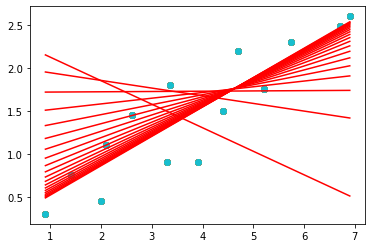

In [26]:
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1

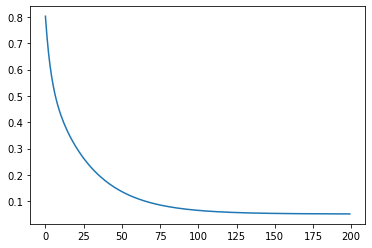

In [27]:
plt.plot(cost_list) #경사 하강 시각화

## 22. scikit-learn

In [59]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split # train/test 데이터셋으로 나눔
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

In [30]:
boston_dataset = load_boston()

In [31]:
print(boston_dataset.DESCR) # 데이터 확인(describe)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
boston_dataset.feature_names # 속성이름 출력

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
boston_dataset.data # 입력변수(행렬)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
boston_dataset.data.shape

(506, 13)

In [37]:
boston_dataset.target # 목표 변수

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
boston_dataset.target.shape

(506,)

In [41]:
x = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [42]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [43]:
x = x[['AGE']]

In [44]:
x

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [45]:
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])

In [46]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 23. scikit-learn 데이터 셋 나누기

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
# test_size : 전체 data에서 test dataset의 비율
# random_state : test data를 어떤식으로 고를지 지정 (optional)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


## 24. scikit-learn으로 선형 회귀 쉽게하기

In [52]:
model = LinearRegression()

In [53]:
model.fit(x_train, y_train)

LinearRegression()

In [55]:
model.coef_ # 세타 1

array([[-0.12402883]])

In [56]:
model.intercept_ # 세타 0

array([31.04617413])

In [57]:
# f(x) = 31.04617413 -0.12402883 * x (최적선)

In [58]:
y_test_prediction = model.predict(x_test) # 최적선으로 새로운 데이터(test) 예측
y_test_prediction

array([[20.31768041],
       [28.14389953],
       [22.84786852],
       [18.64329122],
       [24.62148078],
       [19.99520545],
       [19.75955068],
       [22.79825699],
       [20.92542167],
       [21.74401194],
       [23.29437231],
       [25.41526529],
       [21.53316293],
       [25.94858925],
       [23.76568186],
       [24.55946636],
       [18.64329122],
       [18.64329122],
       [22.00447248],
       [18.64329122],
       [18.89134887],
       [18.90375176],
       [21.33471681],
       [22.71143681],
       [28.46637448],
       [19.06498923],
       [24.31140871],
       [22.05408402],
       [26.32067574],
       [26.59353916],
       [19.0153777 ],
       [18.85414022],
       [19.30064401],
       [18.7301114 ],
       [28.76404367],
       [18.92855752],
       [21.5579687 ],
       [19.21382383],
       [19.69753626],
       [29.08651863],
       [19.56110455],
       [18.64329122],
       [21.02464473],
       [20.14404005],
       [24.72070384],
       [25

In [60]:
# 평균제곱근 오차로, 모델 평가
mean_squared_error(y_test, y_test_prediction) ** 0.5

8.236881612652455

## 16. scikit-learn 데이터 준비 (다중 선형 회귀)

In [ ]:
##### from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split # train/test set으로 분리
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.metrics import mean_squared_error

import pandas as pd

In [10]:
boston_dataset = load_boston()

In [64]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [69]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [70]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])

In [72]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 17.scikit-learn으로 다중 선형 회귀

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split # train set, test set으로 분리
from sklearn.linear_model import LinearRegression # 선형회귀 함수
from sklearn.metrics import mean_squared_error # 평균제곱오차(MSE) 함수

import pandas as pd

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_ # 세타값 (세타 0은 제외)

array([[-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,
         2.70536624e+00, -1.59570504e+01,  3.41397332e+00,
         1.11887670e-03, -1.49308124e+00,  3.64422378e-01,
        -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
        -5.94076089e-01]])

In [23]:
model.intercept_ # 세타 0

array([37.91248701])

In [24]:
y_test_prediction = model.predict(X_test) # 예측값 
y_test_prediction

array([[37.56311787],
       [32.14445143],
       [27.06573629],
       [ 5.67080633],
       [35.09982577],
       [ 5.85803701],
       [27.53708506],
       [31.81019188],
       [26.35634771],
       [22.77208748],
       [31.91183048],
       [21.50224061],
       [23.70119983],
       [33.3622504 ],
       [28.51633591],
       [14.39456899],
       [ 0.19284025],
       [18.66247155],
       [13.71004139],
       [14.13408635],
       [ 2.03263952],
       [19.7280831 ],
       [38.18657429],
       [24.19760058],
       [31.30247973],
       [11.14144544],
       [25.03636951],
       [23.27970871],
       [22.49420127],
       [20.52972594],
       [15.16513744],
       [ 6.92553586],
       [18.3557733 ],
       [22.37179804],
       [28.91287973],
       [19.02980786],
       [30.19357214],
       [ 8.74384915],
       [40.86691522],
       [34.53763591],
       [20.70224878],
       [ 2.59618963],
       [29.99590282],
       [12.15704798],
       [27.10186397],
       [30

In [26]:
mean_squared_error(y_test, y_test_prediction) ** 0.5  #평균제곱근오차  (4.57)

4.568292042303187

## 08. scikit-learn으로 다항 회귀 문제 만들기

In [50]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures # 다항 속성을 생성
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [29]:
boston_dataset = load_boston()

In [30]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [33]:
boston_dataset.data.shape

(506, 13)

In [34]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
polynomial_transformer = PolynomialFeatures(2) # 가설함수(2차 함수) 생성 , 다항 변형기 (다항 회귀를 위해 데이터 가공)

In [39]:
polynomial_data = polynomial_transformer.fit_transform(boston_dataset.data)

In [40]:
polynomial_data

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

In [42]:
polynomial_data.shape # 기존 열 13개를 조합해서 105개의 열을 생성

(506, 105)

In [45]:
polynomial_feature_names = polynomial_transformer.get_feature_names(boston_dataset.feature_names)

In [46]:
polynomial_feature_names #가능한 모든 이차 속성 출력

['1',
 'CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM^2',
 'CRIM ZN',
 'CRIM INDUS',
 'CRIM CHAS',
 'CRIM NOX',
 'CRIM RM',
 'CRIM AGE',
 'CRIM DIS',
 'CRIM RAD',
 'CRIM TAX',
 'CRIM PTRATIO',
 'CRIM B',
 'CRIM LSTAT',
 'ZN^2',
 'ZN INDUS',
 'ZN CHAS',
 'ZN NOX',
 'ZN RM',
 'ZN AGE',
 'ZN DIS',
 'ZN RAD',
 'ZN TAX',
 'ZN PTRATIO',
 'ZN B',
 'ZN LSTAT',
 'INDUS^2',
 'INDUS CHAS',
 'INDUS NOX',
 'INDUS RM',
 'INDUS AGE',
 'INDUS DIS',
 'INDUS RAD',
 'INDUS TAX',
 'INDUS PTRATIO',
 'INDUS B',
 'INDUS LSTAT',
 'CHAS^2',
 'CHAS NOX',
 'CHAS RM',
 'CHAS AGE',
 'CHAS DIS',
 'CHAS RAD',
 'CHAS TAX',
 'CHAS PTRATIO',
 'CHAS B',
 'CHAS LSTAT',
 'NOX^2',
 'NOX RM',
 'NOX AGE',
 'NOX DIS',
 'NOX RAD',
 'NOX TAX',
 'NOX PTRATIO',
 'NOX B',
 'NOX LSTAT',
 'RM^2',
 'RM AGE',
 'RM DIS',
 'RM RAD',
 'RM TAX',
 'RM PTRATIO',
 'RM B',
 'RM LSTAT',
 'AGE^2',
 'AGE DIS',
 'AGE RAD',
 'AGE TAX',
 'AGE PTRATIO',
 'AGE B',
 'AGE LSTAT',
 'DI

In [48]:
X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)

In [49]:
X

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [52]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [54]:
y = pd.DataFrame(boston_dataset.target, columns=['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [63]:
model = LinearRegression() #모델 생성

In [64]:
model.fit(X_train, y_train) #학습

LinearRegression()

In [65]:
model.coef_ # 학습결과(세타 1 ~n)

array([[ 2.55996367e-07, -5.09146959e+00, -1.65753983e-01,
        -5.97358604e+00,  2.43179259e+01,  1.65180559e+02,
         2.19910116e+01,  1.03167123e+00, -5.66895775e+00,
         3.22443249e+00, -1.10055943e-02,  5.35127787e+00,
        -4.81524409e-02,  7.53109325e-01,  2.16774682e-03,
         2.69938772e-01,  5.87901385e-01,  2.41731932e+00,
        -2.52413196e-02,  8.92859572e-02, -5.18832420e-03,
        -5.77807152e-02,  3.55602049e-01, -3.86092281e-02,
         5.43572101e-01, -3.18134358e-04,  2.40035425e-02,
        -7.48850219e-04, -7.16133310e-03, -1.06886010e-01,
        -1.27782609e+00,  2.50137719e-02,  1.14111417e-04,
        -1.25254119e-02, -4.68024813e-03,  6.05725185e-04,
        -8.57873132e-03,  1.85030053e-03, -4.64730601e-03,
         3.08484808e-02, -2.09065897e-01,  1.30035723e+00,
         3.13497405e-01,  6.72540163e-04,  7.51823883e-02,
        -7.38014888e-03,  4.23364348e-04, -6.72155117e-03,
         6.42107774e-03, -5.32275093e-03,  2.43179261e+0

In [66]:
model.intercept_ # 학습결과(세타 0)

array([-141.89855631])

In [67]:
y_test_prediction = model.predict(X_test)

In [69]:
mean_squared_error(y_test, y_test_prediction) ** 0.5

3.196527651449675

## 21. scikit-learn 로지스틱 회귀 데이터 준비

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

In [2]:
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = pd.DataFrame(iris_data.target, columns =['class'])

In [9]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [14]:
y_train = y_train.values.ravel()  # 로지스틱 회귀에서는 작성하는 걸 추천

In [15]:
model = LogisticRegression(solver='saga', max_iter = 2000)
# solver : 모델 최적화 알고리즘
# max_iter: 최적화 과정 반복 횟수 (최적화가 완료되면 반복횟수 전에 종료)
# 학습률은 별도 지정 X

In [16]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='saga')

In [17]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [19]:
model.score(X_test, y_test) # 96 % 확률로 제대로 분류

0.9666666666666667